# Week 2 Problem Set

## Homeworks

**HW1.** *Min-Heap:* Write the following function to implement *min-heap*. A *min-heap* is a binary heap that satisfies the *min-heap property*. This property can be described as:

    For all nodes except the root:
    
    A[left(i)] >= A[i]
    A[right(i)] >= A[i]

- `min_child(heap, index)`: which returns the index of the node's smallest child. The node you are referring has index of value `index`
- `min_heapify(array, index, size)`: which moves the node at `index` down the tree so as to satisfy the *min-heap property*. The argument `index` is the index of the node you want to start moving down in the array. The argument `size` is the size of the heap. This size may be the same or less than the number of elements in the array. Hint: You may need the `min_child()` function.
- `build_min_heap(array)`: which build a *min-heap* from an arbitrary array of integers. This function should make use of `min_heapify(array, index)`. 

In [44]:
# Copy over the implementations of left_of & right_of from the Cohort qns
def left_of(index):
    return (2 * index) + 1

def right_of(index):
    return left_of(index) + 1

In [45]:
def min_child(heap, index, heap_size):
    left = left_of(index)
    right = right_of(index)
    if right >= heap_size or heap[left] < heap[right]:
        return left
    else:
        return right

In [46]:
minheap = [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]
assert min_child(minheap, 0, len(minheap)) == 1
assert min_child(minheap, 2, len(minheap)) == 5
assert min_child(minheap, 3, len(minheap)) == 7
assert min_child(minheap, 1, len(minheap)) == 3
assert min_child(minheap, 4, len(minheap)) == 9

In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Reorder the code for min heapify function. The function takes in the array, the index indicating which node to start the heapifying process and the size of the heap. It should modify the input array in such a way that it satisfies the min-heap property starting from the index node.

Input: 
- array: binary tree to be restored to satisfy the min-heap property
- index: index of the node where the min-heapify property should be satisfied on its subtree
- size: number of elements of the binary tree

Output:
- None, the function should modify the array in-place.

In [48]:
codes = {
    'e': 'def min_heapify(array, index, size):',
        'b': 'cur_idx = index',
        'g': 'while cur_idx < size:',
            'd': 'min_child_idx = min_child(array, cur_idx, size)',
            'f': 'if min_child_idx < size and array[min_child_idx] < array[cur_idx]:',
                'a': 'array[min_child_idx], array[cur_idx] = array[cur_idx], array[min_child_idx]',
            'c': 'cur_idx = min_child_idx',
}

In [49]:
# Enter the key sequence and add "sub" or "exit sub" as necessary
answers = ['e', 'sub', 'b', 'g', 'sub', 'd', 'f', 'sub', 'a', 'end sub', 'c']

###
### YOUR CODE HERE
###


In [50]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Write the code below to test.

In [51]:
def min_heapify(array, index, size):
    left, right = left_of(index), right_of(index)
    is_leaf = left >= size
    is_left_only = right >=  size
    if is_leaf or (array[index] <= array[left] and (is_left_only or array[index] <= array[right])):
        return
    
    if is_left_only or array[left] < array[right]:
        array[left], array[index] = array[index], array[left]
        min_heapify(array, left, size)
    else:
        array[right], array[index] = array[index], array[right]
        min_heapify(array, right, size)

In [52]:
array = [1, 3, 4, 2, 9, 7, 8, 10, 14, 16]
min_heapify(array, 1, len(array))
assert array == [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]

In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [54]:
def build_min_heap(array):
    i = len(array) // 2
    while i >= 0:
        min_heapify(array, i, len(array))
        i -= 1

In [55]:
array = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
print(array)
build_min_heap(array)
print(array)
assert array == [1, 2, 3, 4, 7, 9, 10, 8, 16, 14]

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
[1, 2, 3, 4, 7, 9, 10, 8, 16, 14]


In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Heapsort:* Implement heapsort that makes use of *min-heap* instead of *max-heap*. This function returns a *new* array. The strategy is similar to max-heap, but we will use a new array to store the sorted output. Take note of the hints below:
- The top of the min-heap is always the smallest. You can take this element and put it into the output array.
- To find the next minimum, take the last element of the heap and put it into the first element of the array. Now, the tree is no longer a min-heap. Use `min_heapify()` to restore the min-heap property. This will result in a mean-heap where the first element of the array is the next minimum. You can then take out the top of the min-heap and put it into the output array.
- Reduce the heap size as you go.
- Return the new output array.

In [57]:
import random

# def gen_random_int(number, seed):
#     return (random.seed(seed), random.sample(range(number), k=number))[1]
def gen_random_int(number, seed):
    random.seed(seed)
    res = list(range(number))
    random.shuffle(res)
    return res

In [58]:
def heapsort(array):
    res = []
    build_min_heap(array)
    while len(array) > 0:
        res.append(array[0])
        array[0], array[-1] = array[-1], array[0]
        del array[-1]
        min_heapify(array, 0, len(array))
        # build_min_heap(array)
    return res

In [59]:
array = gen_random_int(10, 100)
result = heapsort(array)
assert result == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [60]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW3.** Compute the computational time for Heap Sort algorithm implemented in Python for various number of inputs. Make use of `gen_random_int(n)` to generate the input array. Use the template below to generate computation time for different number of inputs: 10, 100, 1000, etc.

In [61]:
import time
import random

def run_function(f, x):
    start = time.time()
    f(x)
    end = time.time()
    return end-start

# gen_random_int = lambda number, seed: (random.seed(seed), random.sample(range(number), k=number))[1]

time_heapsort = []
# set the maximum power for 10^power number of inputs
maxpower = 5

for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, etc 
    # use seed 100
    array = gen_random_int(10 ** n, 100)
    
    # call run_function with heapsort and array as arguments
    result = run_function(heapsort, array)
    
    time_heapsort.append(result)

print(time_heapsort)

[3.1948089599609375e-05, 0.0003650188446044922, 0.008955001831054688, 0.10273575782775879, 2.179737091064453]


**HW4.** Plot the output of HW3 by first calculating a new x-axis computed as $n\log_2(n)$. Use the template below.

Reference:
- [Numpy Log2 function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log2.html)

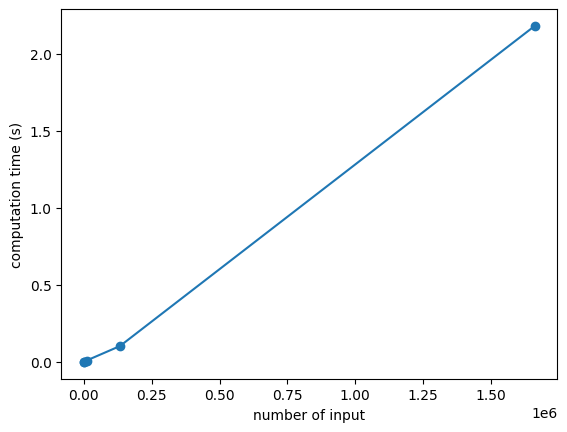

In [62]:
import matplotlib.pyplot as plt
import numpy as np

maxpower = 5
# create an iterable from 1 to maxpowers
powers = range(1, maxpower + 1)
# variable n stores the number of items to sort
n = []

# Create a list of n for our x axis
for exp in powers:
    n.append(10**exp)

# convert to Numpy array
n = np.array(n)

# calculate n*log(n) for x axis 
x = n * np.log2(n)
plt.plot(x, time_heapsort, "-o")
plt.xlabel("number of input")
plt.ylabel("computation time (s)")
plt.show()